# TASK 4 SMS SPAM DETECTION

In [1]:
#importing liabrary
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('spam.csv',encoding='iso-8859-1')

In [3]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN



# DATA PREPROCESS

In [4]:
df.head(8)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN


In [5]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [6]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [7]:
#appers 3 column having null value.They're need to be removed
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [9]:
#rename 1 & 2 columns
df.rename(columns={'v1':'Check','v2':'SMS'},inplace=True)

In [10]:
df

,Check,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [11]:
#converting Check column into form of 0/1s
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Check']=encoder.fit_transform(df['Check'])

In [12]:
df

,Check,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [13]:
# check for duplicates
df.duplicated().sum()

403

In [14]:
#remove duplicate
df=df.drop_duplicates(keep='first')

In [15]:
df.duplicated().sum()

0

In [16]:
#checking how many are spams and how many are hams
df['Check'].value_counts()#

0    4516
1     653
Name: Check, dtype: int64

# VISUALIZE

In [17]:
#IMPORTING LIABRARIES
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
#checking how many are spams and how many are hams
df['Check'].value_counts()

0    4516
1     653
Name: Check, dtype: int64

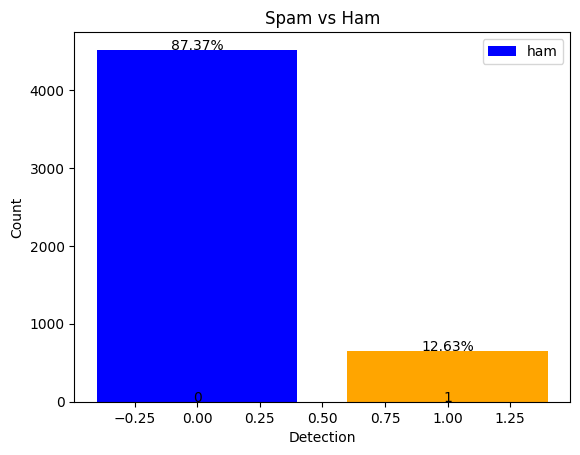

In [19]:
import matplotlib.pyplot as plt

# Assuming 'check_nums' is a Series or DataFrame column with the counts
check_nums = df['Check'].value_counts()

# Define custom colors for 'ham' and 'spam'
colors = ['blue', 'orange']

# Create the bar chart with custom colors
plt.bar(check_nums.index, check_nums.values, color=colors)

# Add labels and title
plt.xlabel('Detection')
plt.ylabel('Count')
plt.title('Spam vs Ham')

# Add percentages on the bars
total = sum(check_nums.values)
for i, count in enumerate(check_nums.values):
    percentage = (count / total) * 100
    plt.text(i, count + 0.5, f'{percentage:.2f}%', ha='center')

# Adding labels on the bars
for i, label in enumerate(check_nums.index):
    plt.text(i, -0.5, label, ha='center', color='black')

# Adding legend
plt.legend(['ham', 'spam'])

plt.show()


In [20]:
#DATA IS IMBALANCED 
#handling Imbalanced Data
import nltk
nltk.download('punkt')


[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [21]:
df['Characters'] = df['SMS'].apply(len)

C:\Users\dj\AppData\Local\Temp\ipykernel_8312\269553215.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Characters'] = df['SMS'].apply(len)


In [22]:
df.head()

,Check,SMS,Characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [23]:
#number of words
df['Words']=df['SMS'].apply(lambda a: len(nltk.word_tokenize(a)))

C:\Users\dj\AppData\Local\Temp\ipykernel_8312\2465192876.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Words']=df['SMS'].apply(lambda a: len(nltk.word_tokenize(a)))


In [24]:
df.head()

,Check,SMS,Characters,Words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [25]:
df.describe()

,Check,Characters,Words
count,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794
std,0.332253,58.236293,13.324758
min,0.000000,2.000000,1.000000
25%,0.000000,36.000000,9.000000
50%,0.000000,60.000000,15.000000
75%,0.000000,117.000000,26.000000
max,1.000000,910.000000,220.000000


In [26]:
df['Sentences'] = df['SMS'].apply(lambda x: len(nltk.sent_tokenize(x)))
#HAM
df[df['Check'] == 0][['Characters','Words','Sentences']].describe()

C:\Users\dj\AppData\Local\Temp\ipykernel_8312\1907003116.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sentences'] = df['SMS'].apply(lambda x: len(nltk.sent_tokenize(x)))


,Characters,Words,Sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [27]:
#SPAM
df[df['Check'] == 1][['Characters','Words','Sentences']].describe()

,Characters,Words,Sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<AxesSubplot: xlabel='Words', ylabel='Count'>

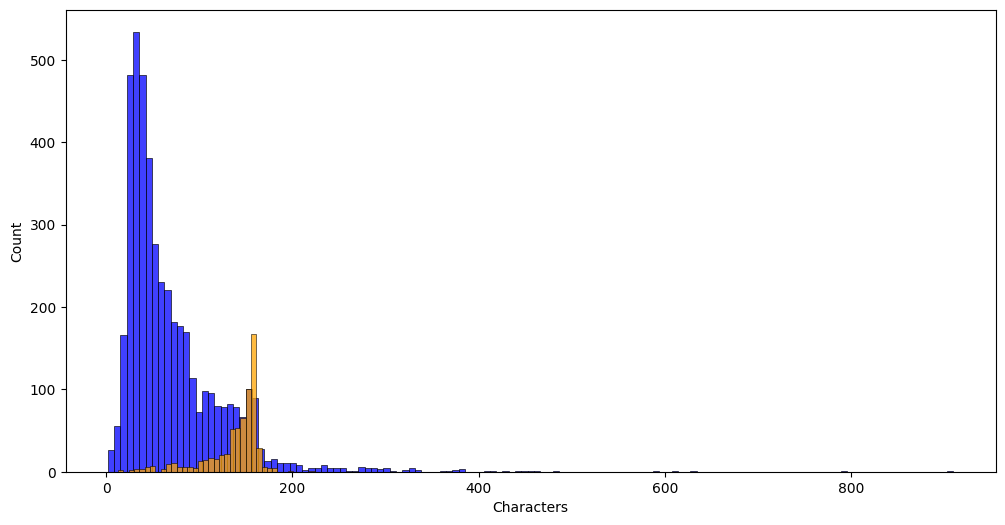

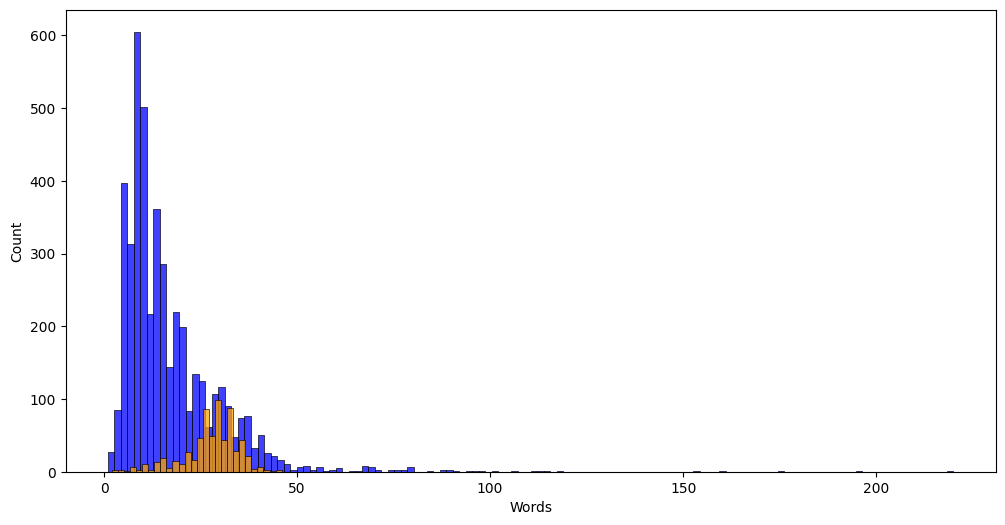

In [28]:
#plotting histogram to distinguish relationship between the sizes of 
#characters and words in spam and ham 
plt.figure(figsize=(12,6))
sns.histplot(df[df['Check']==0]['Characters'],color='blue')
sns.histplot(df[df['Check']==1]['Characters'],color='orange')
plt.figure(figsize=(12,6))
sns.histplot(df[df['Check']==0]['Words'],color='blue')
sns.histplot(df[df['Check']==1]['Words'],color='orange')

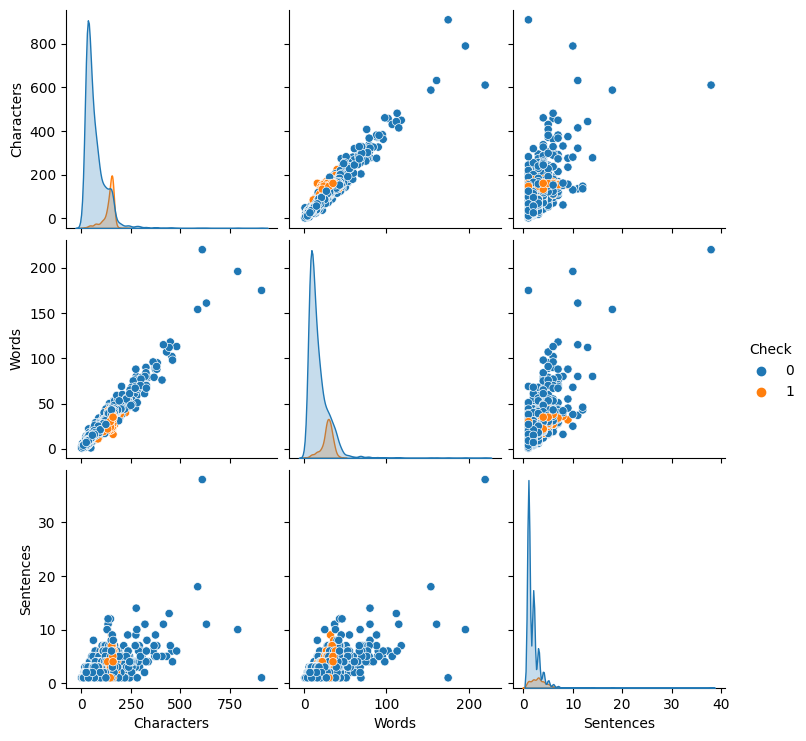

In [29]:
sns.pairplot(df,hue='Check')

C:\Users\dj\AppData\Local\Temp\ipykernel_8312\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<AxesSubplot: >

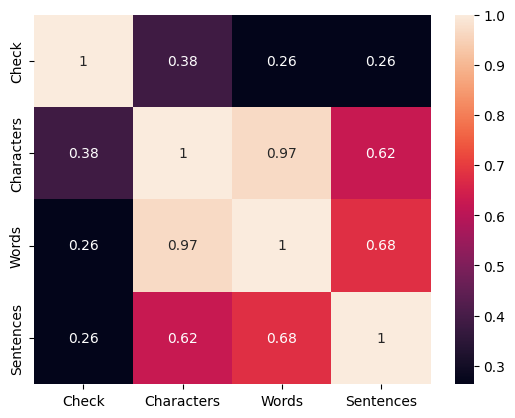

In [30]:
sns.heatmap(df.corr(),annot=True)

# TEXT CLEANING

In [34]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dj\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [35]:
#IMPORTING LIABRARY
from nltk.corpus import stopwords
stopwords.words('english')
import string

string.punctuation
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()



In [42]:
def transform_text(text):
    text = text.lower()
    tokens = nltk.word_tokenize(text)
    
    # Remove non-alphanumeric tokens
    alphanumeric_tokens = [token for token in tokens if token.isalnum()]
    
    # Remove stopwords and punctuation
    filtered_tokens = [token for token in alphanumeric_tokens if token not in stopwords.words('english') and token not in string.punctuation]
    
    # Apply stemming
    ps = PorterStemmer()
    stemmed_tokens = [ps.stem(token) for token in filtered_tokens]
    
    return " ".join(stemmed_tokens)


In [38]:
df['SMS'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [39]:
transform_text("Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...")

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [41]:
df['transformed_SMS'] = df['SMS'].apply(transform_text)

C:\Users\dj\AppData\Local\Temp\ipykernel_8312\2673880551.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_SMS'] = df['SMS'].apply(transform_text)


In [43]:
df.head()

,Check,SMS,Characters,Words,Sentences,transformed_SMS
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [44]:
spam_corpus = []
for text in df[df['Check']==1]['transformed_SMS'].tolist():
    for word in text.split():
        spam_corpus.append(word)

In [45]:
len(spam_corpus)

9939

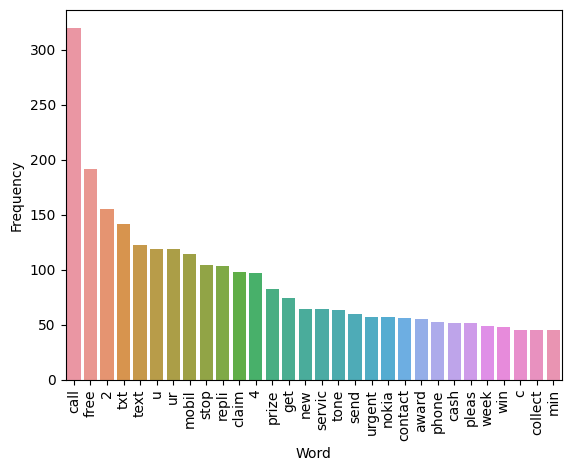

In [46]:
from collections import Counter

# Creating a Counter object to count word frequencies
word_counter = Counter(spam_corpus)

# Getting the most common 30 words and their frequencies
most_common_words = word_counter.most_common(30)

# Convert the most common words and frequencies into a DataFrame
most_common_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

# Create a bar plot using Seaborn
sns.barplot(x='Word', y='Frequency', data=most_common_df)
plt.xticks(rotation='vertical')
plt.show()

In [48]:
ham_corpus = []
for text in df[df['Check']==0]['transformed_SMS'].tolist():
    for word in text.split():
        ham_corpus.append(word)

In [49]:
len(ham_corpus)

35404

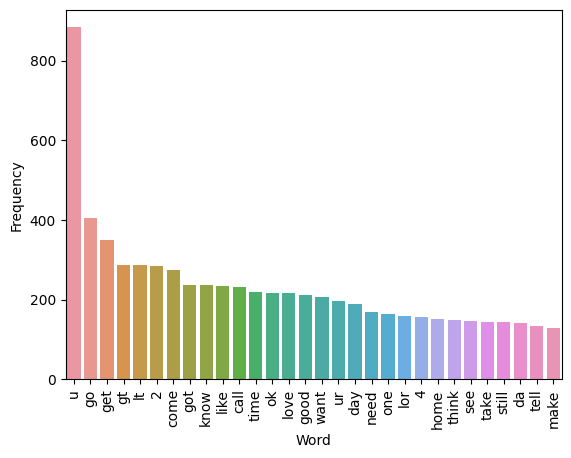

In [50]:
# Creating a Counter object to count word frequencies
word_counter = Counter(ham_corpus)

# Getting the most common 30 words and their frequencies
most_common_words = word_counter.most_common(30)

# Convert the most common words and frequencies into a DataFrame
most_common_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

# Create a bar plot using Seaborn
sns.barplot(x='Word', y='Frequency', data=most_common_df)
plt.xticks(rotation='vertical')
plt.show()

# MODEL

In [53]:
#Applying NAIVE BAYES classifier 
#Text Vectorization using Bag of Words 
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tf = TfidfVectorizer(max_features=3000)

In [54]:
X = tf.fit_transform(df['transformed_SMS']).toarray()

In [55]:
X.shape

(5169, 3000)

In [58]:
y = df['Check'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [59]:
#splitting the data into training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [60]:
#Importing the classifier here 
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [61]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [62]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print("accuracy:")
print(accuracy_score(y_test,y_pred1))
print("Confusion matrix:")
print(confusion_matrix(y_test,y_pred1))
print("precision score:")
print(precision_score(y_test,y_pred1))

accuracy:
0.8694390715667312
Confusion matrix:
[[788 108]
 [ 27 111]]
precision score:
0.5068493150684932


In [63]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print("accuracy:")
print(accuracy_score(y_test,y_pred3))
print("Confusion matrix:")
print(confusion_matrix(y_test,y_pred3))
print("precision score:")
print(precision_score(y_test,y_pred3))

accuracy:
0.9835589941972921
Confusion matrix:
[[895   1]
 [ 16 122]]
precision score:
0.991869918699187


In [64]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print("accuracy:")
print(accuracy_score(y_test,y_pred2))
print("Confusion matrix:")
print(confusion_matrix(y_test,y_pred2))
print("precision score:")
print(precision_score(y_test,y_pred2))

accuracy:
0.9709864603481625
Confusion matrix:
[[896   0]
 [ 30 108]]
precision score:
1.0
